# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [20]:
df.describe()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-0.280318,0.008730,0.219817,-0.622484,-0.219027,0.008730,-0.020908,0.015775,0.016534,-0.940930,...,-0.006989,0.364196,-0.547370,-1.053534,-0.787931,-0.214809,-0.013026,-0.023606,0.763955,0.757333
std,1.905028,1.808023,1.858157,1.897083,1.829504,1.808023,0.984941,1.004072,1.007478,1.833006,...,0.994937,2.367835,2.410636,2.808462,2.109207,1.971414,0.966667,3.238668,1.766913,0.831208
min,-6.488829,-5.728929,-5.986096,-6.796473,-6.944313,-5.728929,-3.305662,-3.140784,-3.003981,-7.425631,...,-2.776227,-7.988263,-10.145810,-10.225420,-7.351862,-6.148477,-3.113757,-10.213564,-7.009872,0.000000
25%,-1.573941,-1.242080,-1.070390,-1.872783,-1.500572,-1.242080,-0.685165,-0.681394,-0.670438,-2.129207,...,-0.702109,-1.160896,-2.148124,-3.018403,-2.167159,-1.612149,-0.667994,-2.141775,-0.301687,0.000000
50%,-0.326086,-0.092583,0.115067,-0.736059,-0.252480,-0.092583,-0.002067,0.049051,0.033758,-0.961813,...,-0.068005,0.313632,-0.587486,-1.139343,-0.833687,-0.315201,0.008196,0.042274,0.823215,1.000000
75%,1.024513,1.240721,1.466301,0.535069,1.031622,1.240721,0.638104,0.736025,0.686753,0.222602,...,0.673382,1.899851,1.065612,0.874122,0.622691,1.178975,0.612777,2.152502,1.959123,2.000000
max,5.417499,7.056915,7.172399,7.657776,5.480250,7.056915,3.035755,2.947124,3.461641,5.401024,...,3.833260,9.105011,7.406914,8.337219,7.612804,6.976406,3.068935,11.759808,6.684227,2.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

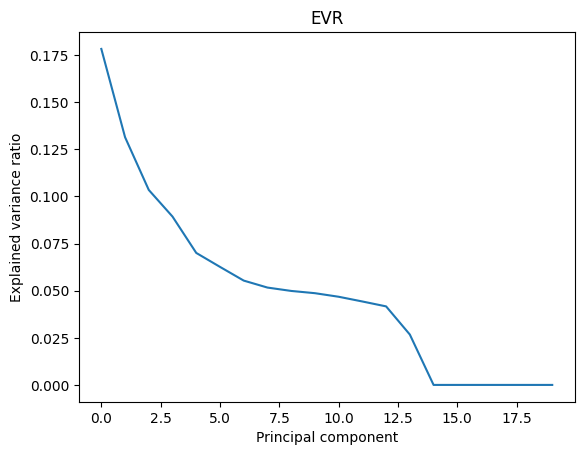

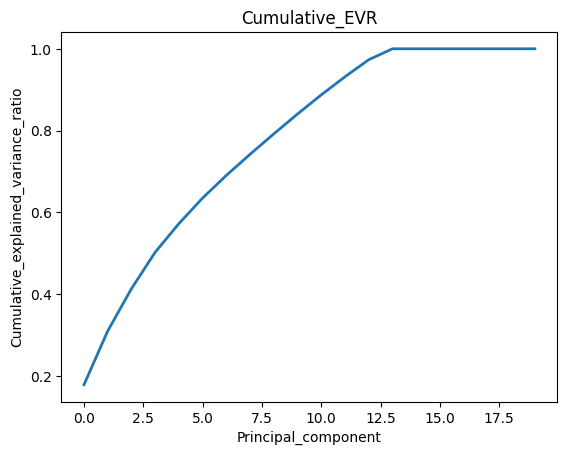

In [5]:
# insert code here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
sca = StandardScaler()
X_train_s = sca.fit_transform(X_train)
X_test_s  = sca.transform(X_test)
pca = PCA().fit(X_train_s)
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)
plt.plot(explained)
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.title('EVR')
plt.show()
plt.plot(cumulative, lw=2)
plt.xlabel('Principal_component')
plt.ylabel('Cumulative_explained_variance_ratio')
plt.title('Cumulative_EVR')
plt.show()

X-axis is Principal component and Y-axis is Cumulative explained variance ratio.

The graphic demonstrates that the first 13 primary components account for the majority of the data's volatility. The explained variance ratio plateaus after the thirteenth main component. As a result, the data can be broken down into 13 primary components.

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [6]:
# Insert code here
target_df = df['target'].value_counts()
print(target_df)

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64


To evaluate the target varaiable in the df object we need to use the value.counts() method.

The measures used to assess a prediction model are Accuracy, Precision, Recall, F1score, and AUC-ROC.

In this instance I've decided to choose the accuracy as a prediction model.



# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [7]:
# Insert code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
l_regression = LogisticRegression(random_state=40)
l_regression.fit(X_train, y_training)
y_prediction_l_regression = l_regression.predict(X_test)

# What is the accuracy, precision, and recall for the test data?

In [8]:
accuracy_lr = accuracy_score(y_test, y_prediction_l_regression)
precision_lr = precision_score(y_test,y_prediction_l_regression,average='weighted')
recall_lr = recall_score(y_test, y_prediction_l_regression,average='weighted')
print(f'Accuracy: {accuracy_lr:.4f}')
print(f'Precision: {precision_lr:.4f}')
print(f'Recall: {recall_lr:.4f}')

Accuracy: 0.7033
Precision: 0.7040
Recall: 0.7033


Without using PCA, the logistic regression model is easy to use.

The logistic regression model can be used, Modeling the probability of the positive class as a function of the input attributes is something we are interested in. Logistic regression is an easy-to-understand method that is simplistic but successful in a variety of situations.

Accuracy is 0.7033,
Precision is 0.7040,
Recall is 0.7033.

I have chosen accuracy to predict the model for this dataset.



# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

# Use PCA within a pipeline to create a logistic regression model using best practices from class.

In [9]:
# Insert code
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

p_lr = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LogisticRegression(random_state=40))
             ])

params = {'model__C': [0.01, 0.1, 1, 10], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

plogistic = GridSearchCV(p_lr, param_grid=params, scoring='accuracy', cv=10, refit=True)
plogistic = plogistic .fit(X_train, y_training)

plogistic.best_estimator_



Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(C=0.1, random_state=40))])

In [10]:
p_lr.fit(X_train, y_training)
y_pred_lr = p_lr.predict(X_test)

# What is the accuracy, precision, and recall for the test data?

In [11]:
acc = accuracy_score(y_test, y_pred_lr)
pre = precision_score(y_test, y_pred_lr,average='weighted')
reca = recall_score(y_test, y_pred_lr,average='weighted')

print(f'Accuracy: {acc:.4%}')
print(f'Precision: {pre:.4%}')
print(f'Recall: {reca:.4%}')

Accuracy: 70.3333%
Precision: 70.4025%
Recall: 70.3333%


When compared to the original logistic regression model, using the PCA model to create the model has the highest metrics. For example, the accuracy is slightly higher at 70.33%.

In order to create the logistic regression model for this dataframe, I would prefer to use the PCA model.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [12]:
# Insert code here
from sklearn.tree import DecisionTreeClassifier
# decision tree model
dt_classifier = DecisionTreeClassifier(random_state=40)
dt_classifier.fit(X_train, y_training)
y_pred_dt_classifier = dt_classifier.predict(X_test)


In [13]:
#  performance
accuracy = accuracy_score(y_test, y_pred_dt_classifier)
precision = precision_score(y_test, y_pred_dt_classifier,average='weighted')
recall = recall_score(y_test,y_pred_dt_classifier,average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.6667
Precision: 0.6848
Recall: 0.6667


# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

pipeline_Dec = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', DecisionTreeClassifier(random_state=40))
             ])

params = {'model__max_depth': [2, 4, 6, 8, 10, 12, 14, 16, None], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

DT_class = GridSearchCV(pipeline_Dec, param_grid=params, scoring='accuracy', cv=10, refit=True)
DT_class = DT_class.fit(X_train, y_training)

DT_class.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=6)),
                ('model',
                 DecisionTreeClassifier(max_depth=6, random_state=40))])

In [18]:
# Fit pipeline 
pipeline_Dec.fit(X_train, y_training)
y_pred_DT_class = pipeline_Dec.predict(X_test)


In [19]:
# Evaluate model performance metrics
accuracy = accuracy_score(y_test, y_pred_DT_class)
precision = precision_score(y_test, y_pred_DT_class,average='weighted')
recall = recall_score(y_test, y_pred_DT_class,average='weighted')
print(f'Accuracy: {accuracy:.4%}')
print(f'Precision: {precision:.4%}')
print(f'Recall: {recall:.4%}')

Accuracy: 72.0000%
Precision: 72.4297%
Recall: 72.0000%
